In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:

# Loading the training and testing data
train_data = pd.read_csv('twitter_training.csv')
test_data = pd.read_csv('twitter_test.csv')


# Displaying the first few rows of the training data
print(train_data.head())

   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     


In [3]:
print(train_data.shape)
print(test_data.shape)

(74681, 4)
(999, 4)


In [4]:
train_data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [5]:
train_data.columns

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

In [6]:
# Renaming columns for easier access
train_data.columns = ['id ' , 'topic' ,'label' ,'text']
test_data.columns = ['id ' , 'topic' ,'label' ,'text']

train_data.head()


,id,topic,label,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [35]:
# 1. Basic info
print("📦 Data shape:", train_data.shape)
print("\n📋 Column info:")
print(train_data.info())



📦 Data shape: (73995, 4)

📋 Column info:
<class 'pandas.core.frame.DataFrame'>
Index: 73995 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      73995 non-null  int64 
 1   topic   73995 non-null  object
 2   label   73995 non-null  object
 3   text    73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB
None


In [7]:
# 2. Missing values
print("\n❌ Missing values per column:")
print(train_data.isnull().sum())

# 3. Duplicate rows
duplicates = train_data.duplicated().sum()
print(f"\n📑 Number of duplicate rows: {duplicates}")


❌ Missing values per column:
id         0
topic      0
label      0
text     686
dtype: int64

📑 Number of duplicate rows: 2700



🎯 Label Distribution:
label
Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64


/var/folders/xs/ws17g1qx0ts2gzzly4gqzgmc0000gn/T/ipykernel_14061/1225125314.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


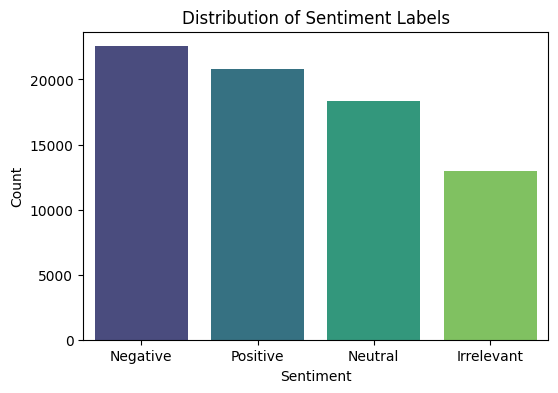


Percentage distribution:
label
Negative      30.18
Positive      27.89
Neutral       24.53
Irrelevant    17.39
Name: count, dtype: float64


In [9]:
# Label counts
label_counts = train_data['label'].value_counts()

print("\n🎯 Label Distribution:")
print(label_counts)

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title("Distribution of Sentiment Labels")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Percentage form
print("\nPercentage distribution:")
print(round(100 * label_counts / label_counts.sum(), 2))



📝 Word count statistics:
count    74681.000000
mean        19.059306
std         14.480928
min          0.000000
25%          8.000000
50%         15.000000
75%         27.000000
max        198.000000
Name: word_count, dtype: float64


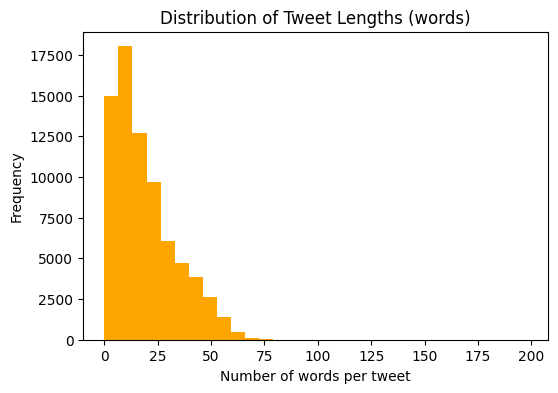

/var/folders/xs/ws17g1qx0ts2gzzly4gqzgmc0000gn/T/ipykernel_14061/4234030428.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_len.index, y=avg_len.values, palette='cool')


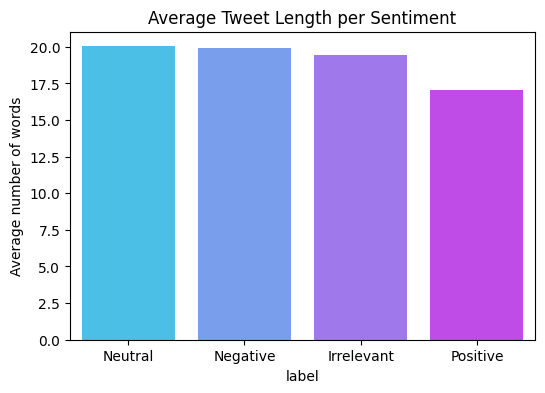


Average tweet length by label:
label
Neutral       20.027787
Negative      19.891669
Irrelevant    19.466205
Positive      17.053190
Name: word_count, dtype: float64


In [10]:
# Word count per tweet
train_data['word_count'] = train_data['text'].apply(lambda x: len(str(x).split()))

# Character count
train_data['char_count'] = train_data['text'].apply(lambda x: len(str(x)))

print("\n📝 Word count statistics:")
print(train_data['word_count'].describe())

# Histogram
plt.figure(figsize=(6,4))
plt.hist(train_data['word_count'], bins=30, color='orange')
plt.title("Distribution of Tweet Lengths (words)")
plt.xlabel("Number of words per tweet")
plt.ylabel("Frequency")
plt.show()

# Average tweet length per sentiment
avg_len = train_data.groupby('label')['word_count'].mean().sort_values(ascending=False)
plt.figure(figsize=(6,4))
sns.barplot(x=avg_len.index, y=avg_len.values, palette='cool')
plt.title("Average Tweet Length per Sentiment")
plt.ylabel("Average number of words")
plt.show()

print("\nAverage tweet length by label:")
print(avg_len)


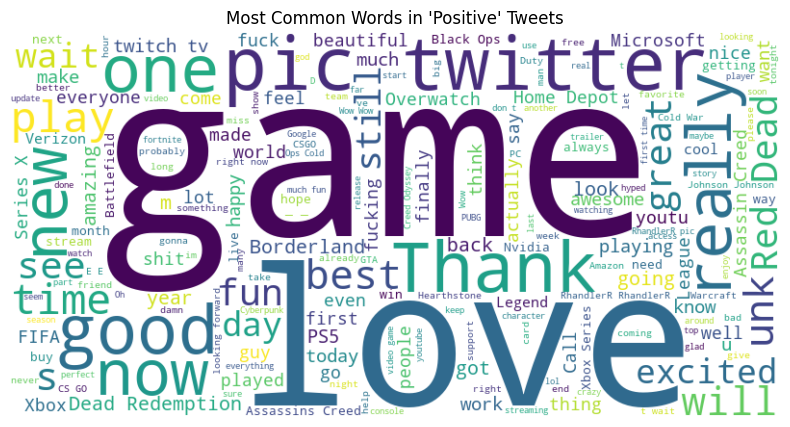

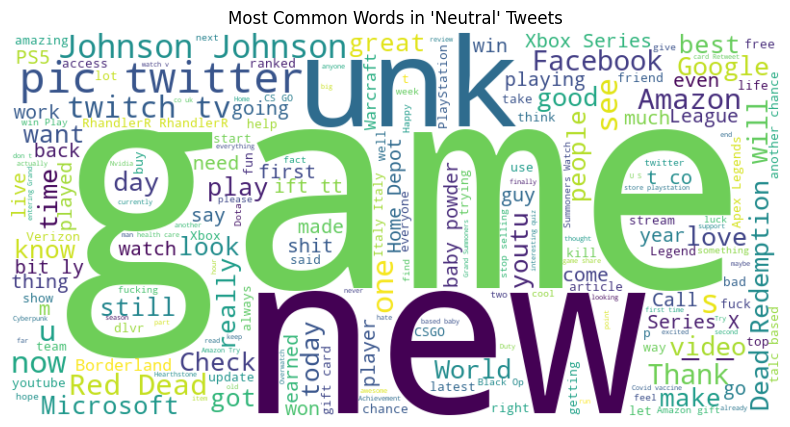

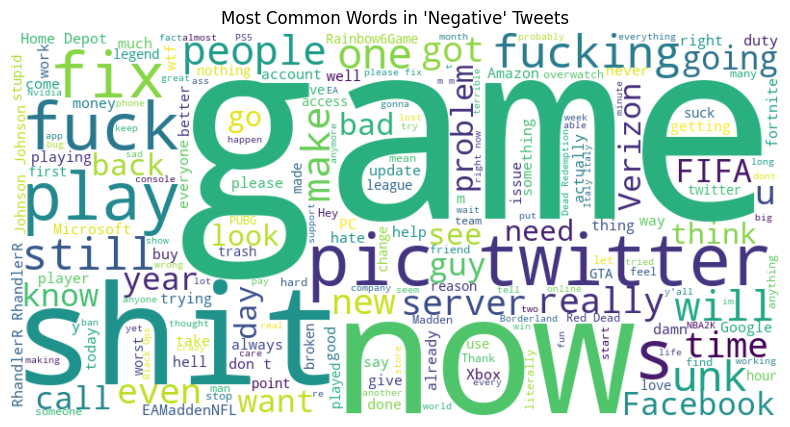

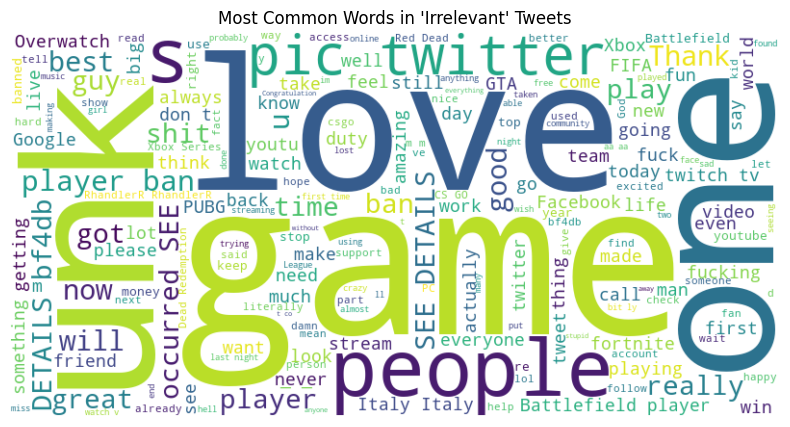

In [21]:
from wordcloud import WordCloud
import re

def clean_text_for_wc(text):
    if not isinstance(text, str):
        return ""
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\@\w+|\#', '', text)
    return text

train_data['clean_text'] = train_data['text'].apply(clean_text_for_wc)

for sentiment in train_data['label'].unique():
    all_text = " ".join(train_data[train_data['label'] == sentiment]['clean_text'].dropna().astype(str))
    if len(all_text.strip()) == 0:
        print(f"⚠️ Skipping {sentiment}: no valid text.")
        continue
    wc = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(all_text)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Most Common Words in '{sentiment}' Tweets")
    plt.show()




In [17]:
print("🔍 Insights Summary:")
print(f"Total samples: {len(train_data)}")
print(f"Duplicate rows: {duplicates}")
print(f"Max tweet length (words): {train_data['word_count'].max()}")
print(f"95th percentile tweet length: {np.percentile(train_data['word_count'], 95)}")
print(f"Average tweet length: {train_data['word_count'].mean():.1f} words")


🔍 Insights Summary:
Total samples: 74681
Duplicate rows: 2700
Max tweet length (words): 198
95th percentile tweet length: 49.0
Average tweet length: 19.1 words
